In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 第四章　暖冷房設備

# 第二節　ダクト式セントラル空調機

## 5.　最大暖房出力

日付$d$の時刻$t$における1時間当たりの最大暖房出力$Q_{max,H,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    Q_{max,H,d,t} = q_{ac,rtd,H} \times C_{df,d,t} \times 3600 \times 10^{-6}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h)  
$q_{ac,rtd,H}$：空調機の定格暖房能力(W)  
$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  

である。

空調機の定格暖房能力$q_{ac,rtd,H}$は、付録Aにより定まる。

In [2]:
def Q_max_H(q_ac_rtd_H, C_df):
    '''最大暖房出力(MJ/h)を計算する'''
    # q_ac_rtd_H: 空調機の定格暖房能力(W)
    # C_df: デフロストに関する暖房出力補正係数(-)

    return q_ac_rtd_H * C_df * 3600 * 10**(-6)

日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数$C_{df,d,t}$は、外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合にデフロストが発生すると仮定して、式(2)により定まる。

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 0.77
\end{equation*}
$$


<div style="text-align: right;"> (2-1) </div>

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃以上かつ外気相対湿度$h_{ex,d,t}$が80%未満の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 1.0
\end{equation*}
$$


<div style="text-align: right;"> (2-2) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$h_{ex,d,t}$：日付$d$の時刻$t$における外気相対湿度(%)  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度(℃)  

である。

In [3]:
def get_C_df(theta_ex, h_ex):
    '''デフロストに関する暖房出力補正係数(-)を取得する'''
    # theta_ex: 外気温度(℃)
    # h_ex: 外気相対湿度(%)
    
    if theta_ex < 5 and 80<= h_ex:
        return  0.77
    else:
        return  1.0

Example

In [4]:
np.vectorize(get_C_df)([[4],[5],[6]],[79,80,81])

array([[1.  , 0.77, 0.77],
       [1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  ]])

In [5]:
Q_max_H(1000, get_C_df(20, 70))

3.5999999999999996

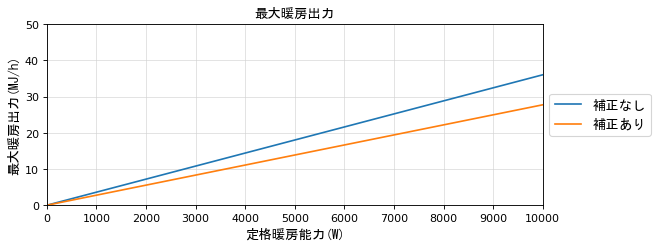

In [6]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('最大暖房出力', fontdict={'fontproperties':fp})

for i,category in enumerate(['補正なし','補正あり']):
    x_values =[x for x in range(0, 10000)]
    y_values = {'補正なし' :[Q_max_H(x, get_C_df(20, 70)) for x in x_values],
                '補正あり' :[Q_max_H(x, get_C_df( 0, 90)) for x in x_values]}[category]
    plt.plot(x_values, y_values, label=category)
        
ax=plt.gca()
ax.set_xlabel('定格暖房能力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 11000, 1000)], minor=False)
ax.set_xbound(lower=0, upper=10000)

ax.set_ylabel('最大暖房出力(MJ/h)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 60, 10)], minor=False)
ax.set_ybound(lower=0, upper=50)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

## 6.　暖房エネルギー消費量

### 6.1　消費電力量

日付$d$の時刻$t$における1時間当たりの消費電力量$E_{E,H,d,t}$は、式(3)により表される。

<p style="text-indent:2em">TG案：</p> 
<p style="text-indent:4em">最小・中間・定格の仕様が既知の場合、もしくは中間・定格の仕様が既知の場合：</p> 
$$ 
\begin{equation*}
    E_{E,H,d,t} = \left( E_{E,comp,H,d,t} + E_{E,fan,H,d,t} \right) \times C_{DL}
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

<p style="text-indent:4em">定格の仕様のみが既知の場合：</p> 
$$ 
\begin{equation*}
    E_{E,H,d,t} = \mbox{（現行の評価法）}
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$C_{DL}$：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの空気搬送ファンの消費電力量(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

断熱区画外ダクト熱損失による消費電力量補正係数$C_{DL}$は、付録Cにより定まる。

In [7]:
def E_E_H(E_E_comp_H, E_E_fan_H, C_DL):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_fan_H：空気搬送ファンの消費電力量(kWh/h)
    # C_DL：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
    
    return (E_E_comp_H + E_E_fan_H) * C_DL

<p style="text-indent:2em">変更案：</p> 
$$ 
\begin{equation*}
    E_{E,H,d,t} = E_{E,comp,H,d,t} + E_{E,fan,H,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における1時間当たりの空気搬送ファンの消費電力量のうちの暖房設備への負荷分(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

In [8]:
def E_E_H_rev(E_E_comp_H, E_E_fan_H):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_fan_H：空気搬送ファンの消費電力量(kWh/h)
    
    return E_E_comp_H + E_E_fan_H

### 6.2　ガス消費量

（省略）

### 6.3　石油消費量

（省略）

### 6.4　その他の燃料による一次エネルギー消費量

（省略）

## 7.　最大冷房出力

（工事中）

## 8.　冷房エネルギー消費量

（工事中）

## 9.　換気エネルギー消費量

（工事中）

## 10.　圧縮機

### 10.1　消費電力量

#### 10.1.1　暖房

日付$d$の時刻$t$における1時間当たりの圧縮機の消費電力量$E_{E,comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">TG案：</p> 
$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {e_{th,H,d,t} \times r_{comp,H,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  

である。

In [9]:
def E_E_comp_H(Q_dash_T_H, e_th_H, r_comp_H):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：冷凍サイクルの理論暖房効率(-)  
    # r_comp_H：冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    
    return Q_dash_T_H / (e_th_H * r_comp_H)

<p style="text-indent:2em">変更案：</p> 
$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {e_{th,H,d,t} \times r_{comp,H,d,t} \times C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  

である。

In [10]:
def E_E_comp_H_rev(Q_dash_T_H, e_th_H, r_comp_H, C_df):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：冷凍サイクルの理論暖房効率(-)  
    # r_comp_H：冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_dash_T_H / (e_th_H * r_comp_H * C_df)

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率$e_{th,H}$は、付録Dにより計算される値とする。

日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷$Q'_{T,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">TG案：</p> 
$$ 
\begin{equation*}
    {Q'_{T,H,d,t}} = \frac{{Q_{T,H,d,t}}} {C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

In [11]:
def Q_dash_T_H(Q_T_H, C_df):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_T_H / C_df

<p style="text-indent:2em">変更案：</p> 
$$ 
\begin{equation*}
    {Q'_{T,H,d,t}} = {Q_{T,H,d,t}} + {Q_{DL}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$Q_{DL}$：断熱区画外ダクト熱損失(MJ/h)   
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

In [12]:
def Q_dash_T_H_rev(Q_T_H, Q_DL):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # Q_DL: 断熱区画外ダクト熱損失による処理暖房負荷補正量(MJ/h)
    
    return Q_T_H + C_DL

#### 10.1.2　冷房

（工事中）

### 10.2　冷凍サイクルの理論効率に対する圧縮機効率の比

#### 10.2.1　暖房

日付$d$の時刻$t$における冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">$Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,min, H}$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,min,H} - \left\{ q_{ac,min,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,min,H}}{q_{ac,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

<p style="text-indent:2em">$q_{ac,min, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,mid, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,mid,H} - \left\{ q_{ac,mid,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,mid,H} - r_{comp,min,H}}{q_{ac,mid,H} - q_{ac,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

<p style="text-indent:2em">$q_{ac,mid, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,rtd, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,rtd,H} - \left\{ q_{ac,rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H} - r_{comp,mid,H}}{q_{ac,rtd,H} - q_{ac,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-3) </div>

<p style="text-indent:2em">$q_{ac,rtd, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right)$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = max \left( 0.4, \: r_{comp,rtd,H} - \left\{ q_{ac,rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H}}{q_{ac,rtd,H}} \right)
\end{equation*}
$$

<div style="text-align: right;"> (@-4) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   
$q_{ac,mid,H}$：空調機の中間暖房能力(W)   
$q_{ac,min,H}$：空調機の最小暖房能力(W)   
$q_{ac,rtd,H}$：空調機の定格暖房能力(W) 

である。

空調機の最小暖房能力$q_{ac,min,H}$、空調機の中間暖房能力$q_{ac,mid,H}$および空調機の定格暖房能力$q_{ac,rtd,H}$は、付録Aにより定まる。

In [13]:
def r_comp_H(Q_dash_T_H, r_comp_min_H, r_comp_mid_H, r_comp_rtd_H, q_ac_min_H, q_ac_mid_H, q_ac_rtd_H):
    '''最小・中間・定格の理論暖房効率に対する圧縮機の暖房効率の比から当該時刻の値を外挿する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h) 
    # r_comp_min_H：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_mid_H：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_rtd_H：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # q_ac_min_H：空調機の最小暖房能力(W)
    # q_ac_mid_H：空調機の中間暖房能力(W)
    # q_ac_rtd_H：空調機の定格暖房能力(W)
    
    # 単位換算：MJ/h => W
    Q_dash_T_H_Wat = Q_dash_T_H / (3600 * 10**(-6))
    
    if  Q_dash_T_H_Wat <= q_ac_min_H:
        return r_comp_min_H - (q_ac_min_H - Q_dash_T_H_Wat) * r_comp_min_H  / q_ac_min_H
    elif  q_ac_min_H < Q_dash_T_H_Wat <= q_ac_mid_H:
        return r_comp_mid_H - (q_ac_mid_H - Q_dash_T_H_Wat) * (r_comp_mid_H - r_comp_min_H)  / (q_ac_mid_H - q_ac_min_H)
    elif  q_ac_mid_H < Q_dash_T_H_Wat <= q_ac_rtd_H:
        return r_comp_rtd_H - (q_ac_rtd_H - Q_dash_T_H_Wat) * (r_comp_rtd_H - r_comp_mid_H)  / (q_ac_rtd_H - q_ac_mid_H)
    elif  q_ac_rtd_H < Q_dash_T_H_Wat:
        return max(0.4, r_comp_rtd_H - (q_ac_rtd_H - Q_dash_T_H_Wat) * r_comp_rtd_H  / q_ac_rtd_H)
    else:
        raise Exeption

最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,min,H}$、中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,mid,H}$および定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,rtd,H}$は、式(@)により定まる。

$$ 
\begin{equation*}
    r_{comp,min,H} = \frac{e_{comp,min,H}}{e_{th,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    r_{comp,mid,H} = \frac{e_{comp,mid,H}}{e_{th,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    r_{comp,rtd,H} = \frac{e_{comp,rtd,H}}{e_{th,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$e_{th,mid,H}$：中間暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$e_{th,min,H}$：最小暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$e_{th,rtd,H}$：定格暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   

である。

最小暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,min,H}$、中間暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,mid,H}$、定格暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,rtd,H}$は、付録Dにより計算される値とする。

In [14]:
def r_comp_op_H(e_comp_op_H, e_th_op_H):
    '''最小・中間・定格の理論暖房効率に対する圧縮機の暖房効率の比を計算する'''
    # e_comp_op_H：任意の能力による運転時における圧縮機の暖房効率(-)
    # e_th_op_H：任意の能力による運転時における冷凍サイクルの理論暖房効率(-)
    
    return e_comp_op_H/ e_th_op_H

最小暖房能力運転時における圧縮機の暖房効率$e_{comp,min,H}$、中間暖房能力運転時における圧縮機の暖房効率$e_{comp,mid,H}$、定格暖房能力運転時における圧縮機の暖房効率$e_{comp,rtd,H}$は、式(@)により計算される値とする。

$$ 
\begin{equation*}
    e_{comp,min,H} = \frac{q_{ac,min,H}}{P_{ac,min,H} - P_{fan,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    e_{comp,mid,H} = \frac{q_{ac,mid,H}}{P_{ac,mid,H} - P_{fan,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    e_{comp,rtd,H} = \frac{q_{ac,rtd,H}}{P_{ac,rtd,H} - P_{fan,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$P_{ac,mid,H}$：空調機の中間暖房消費電力(W)   
$P_{ac,min,H}$：空調機の最小暖房消費電力(W)   
$P_{ac,rtd,H}$：空調機の定格暖房消費電力(W)   
$P_{fan,mid,H}$：中間暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,min,H}$：最小暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,rtd,H}$：定格暖房能力運転時における空気搬送ファンの消費電力(W)   
$q_{ac,mid,H}$：空調機の中間暖房能力(W)   
$q_{ac,min,H}$：空調機の最小暖房能力(W)   
$q_{ac,rtd,H}$：空調機の定格暖房能力(W) 

である。

空調機の最小暖房能力$q_{ac,min,H}$、空調機の中間暖房能力$q_{ac,mid,H}$および空調機の定格暖房能力$q_{ac,rtd,H}$、空調機の最小暖房消費電力$P_{ac,min,H}$、空調機の中間暖房消費電力$P_{ac,mid,H}$、空調機の定格暖房消費電力$P_{ac,rtd,H}$、最小暖房能力運転時における空気搬送ファンの消費電力$P_{fan,min,H}$、中間暖房能力運転時における空気搬送ファンの消費電力$P_{fan,mid,H}$および定格暖房能力運転時における空気搬送ファンの消費電力$P_{fan,rtd,H}$は、付録Aにより定まる。

In [15]:
def e_comp_op_H(q_ac_op_H, P_ac_op_H, P_fan_op_H):
    '''最小・中間・定格の縮機の暖房効率を計算する'''
    # q_ac_op_H：空調機の暖房能力(W)
    # P_ac_op_H：暖房能力q_ac_op_Hによる運転時における空調機の消費電力(W)
    # P_fan_op_H：暖房能力q_ac_op_Hによる運転時における空気搬送ファンの消費電力(W)
    
    return q_ac_op_H/ (P_ac_op_H - P_fan_op_H)

#### 10.2.2　冷房

（工事中）

## 11.　空気搬送ファン

### 11.1　消費電力

日付$d$の時刻$t$における空気搬送ファンの消費電力$P_{fan,t,d}$は、式(@)により表される。

<p style="text-indent:2em">サーモオフ機能がない場合：（TGに確認中）</p> 
$$ 
\begin{equation*}
    P_{fan,d,t} = 
\end{equation*}
$$

<div style="text-align: right;"> (@a-1) </div>

<p style="text-indent:2em">サーモオフ機能がある場合：</p> 

<p style="text-indent:4em">$V_{fan,d,t} \leq V_{fan,thermo-off}$の場合：</p> 
$$ 
\begin{equation*}
    P_{fan,d,t} = P_{fan,thermo-off}
\end{equation*}
$$

<div style="text-align: right;"> (@b-1) </div>

<p style="text-indent:4em">$V_{fan,thermo-off} < V_{fan,d,t}$の場合：</p> 
$$ 
\begin{equation*}
    P_{fan,d,t} = P'_{fan,rtd}  - \left( P'_{fan,rtd} - P_{thermo-off} \right) \times \frac{V_{fan,rtd}-V_{fan,d,t}}{V_{fan,rtd}-V_{fan,thermo-off}}
\end{equation*}
$$

<div style="text-align: right;"> (@b-2) </div>

ここで、  

$P'_{fan,rtd}$：ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,t,d}$：日付$d$の時刻$t$における空気搬送ファンの消費電力(W)   
$P_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの消費電力(W)   
$V_{fan,rtd}$：定格能力運転時における空気搬送ファンの風量(m3/h)    
$V_{fan,d,t}$：日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量(m3/h)   
$V_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの風量(m3/h)    
   
である。

サーモオフ運転時における空気搬送ファンの消費電力$P_{fan,thermo-off}$、定格能力運転時における空気搬送ファンの風量$V_{fan,rtd}$およびサーモオフ運転時における空気搬送ファンの風量$V_{fan,thermo-off}$は、付録Aにより定まる。

ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力$P'_{fan,rtd}$は、式(@)により計算される。

$$ 
\begin{equation*}
    P'_{fan,rtd} = P_{fan,rtd} + P_{ac,rtd} \times \left( C_{pl} -1 \right)
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$C_{pl}$：ダクト等圧力損失による空調機の消費電力量補正係数(-)   
$P_{ac,rtd}$：定格能力運転時における空調機の消費電力(W)   
$P_{fan,rtd}$：定格能力運転時における空気搬送ファンの消費電力(W)   
$P'_{fan,rtd}$：ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力(W)     
   
である。

定格能力運転時における空気搬送ファンの消費電力定格能力運転時における空調機の消費電力$P_{ac,rtd}$および$P_{fan,rtd}$は、付録Aにより定まる。

ダクト等圧力損失による空調機の消費電力量補正係数$C_{pl}$は、ダクト等圧力損失の影響により所定の風量に達しない場合に空気搬送ファンの周波数が増段すること（風量補正機能）による空調機の消費電力量への増加を考慮するための係数であり、空気搬送ファンに風量補正機能がない場合は1.0とし、空気搬送ファンに風量補正機能がある場合は付録Bにより定まる値とする。

### 11.2　風量

日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量$V_{fan,d,t}$は、式(@)により表される。

<p style="text-indent:2em">サーモオフ機能がない場合：（TGに確認中）</p> 
$$ 
\begin{equation*}
    V_{fan,d,t} = 
\end{equation*}
$$

<div style="text-align: right;"> (@a-1) </div>

<p style="text-indent:2em">サーモオフ機能がある場合：</p> 
$$ 
\begin{equation*}
    V_{fan,d,t} = \left\{ \frac{Q'_{T,H,d,t}}{q_{rtd} \times 3600 \times 10^{-6}} \times \left( V_{fan,rtd} -V_{fan,thermo-off} \right) + V_{fan,thermo-off} \right\} \times \frac{V_{fa,dsng}}{V_{fa,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (@b-1) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$q_{ac,rtd,H}$：空調機の定格暖房能力(W)   
$V_{fan,dsng}$：空気搬送ファンの設計風量(m3/h)    
$V_{fan,rtd}$：定格能力運転時における空気搬送ファンの風量(m3/h)    
$V_{fan,d,t}$：日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量(m3/h)   
$V_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの風量(m3/h)    

である。

空調機の定格暖房能力$q_{ac,rtd,H}$、定格能力運転時における空気搬送ファンの風量$V_{fan,rtd}$およびサーモオフ運転時における空気搬送ファンの風量$V_{fan,thermo-off}$は、付録Aにより定まる。空気搬送ファンの設計風量$V_{fan,dsng}$は、＊＊＊＊（TGに確認中）により定まる。

## 付録A　機器の性能を表す仕様の決定方法

### A.2　暖房能力・冷房能力・暖房消費電力・冷房消費電力

#### A.2.1　JIS B8615-2の性能試験による測定値を用いる方法

定格暖房能力$q_{rtd,H}$は、JIS B8616が定める定格暖房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値とする。

中間暖房能力$q_{mid,H}$は、、JIS B8616が定める中間暖房標準能力の定義に基づき、JISB8615-2が定める性能試験により得られる値とするか、式(1)により算定される値とする。

$$ 
\begin{equation*}
    q_{mid,H} = q_{rtd,H} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (1) </div>

最小暖房能力$q_{min,H}$は、JIS B8616が定める最小暖房標準能力の定義に基づき、JISB8615-2が定める性能試験により得られる値とするか、式(2)により算定される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

（消費電力の定め方をTGに確認中）

#### A.2.2　床面積に基づく方法

（定格以外の定め方をTGに確認中）

### A.3　空気搬送の風量及び消費電力

#### A.3.1　暖房時・冷房時

（工事中）

#### A.3.2　サーモオフ時

（工事中）

## 付録D　冷凍サイクルの理論効率（TG案）

### D.3　冷凍サイクルの理論暖房効率

冷凍サイクルの理論暖房効率$e_{th,op,H}$は、式(1)により定まる。

$$ 
\begin{equation*} 
    e_{th,op,H} = -0.0032 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{4} +0.1196 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{3} -1.7392 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{2} +12.242 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)  -25.821
\end{equation*}
$$

<div style="text-align: right;"> (1) </div>

ここで、  

$f_{H} \left( \theta_{ex} , \: \theta_{hex} \right)$：＊＊＊＊  
$e_{th,op,H}$：任意の能力による運転時における冷凍サイクルの理論暖房効率(-)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{surf,hex}$：室内機熱交換器表面温度(℃)

である。

In [16]:
def e_th_op_H(f_H):
    '''冷凍サイクルの理論暖房効率(-)を計算する'''
    # f_H:
    
    return -0.0032*f_H**(4) +0.1196*f_H**(3) -1.7392*f_H**(2) +12.242**f_H -25.821

＊＊＊＊$f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)$は、式(2)により表される。

$$ 
\begin{equation*} 
    f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) = 15.38582 + 0.255506 \times \theta_{ex} -0.23883 \times \theta_{surf,hex} 
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)$：＊＊＊＊  
$\theta_{ex}$：外気温度(℃)  
$\theta_{hex}$：室内機熱交換器の表面温度(℃)

である。

In [17]:
def f_H(theta_ex, theta_surf_hex):
    '''＊＊＊＊を計算する'''
    # theta_ex：外気温度（℃）
    # theta_surf_hex：室内機熱交換器の表面温度（℃）
    
    return 15.38582 +0.255506*theta_ex -0.23883*theta_surf_hex

### D.4　室内機熱交換器表面温度

室内機熱交換器表面温度$\theta_{surf,hex}$は、式(3)により表される。

$$ 
\begin{equation*} 
    \theta_{surf,hex} = \frac{\theta_{air,{\textit inlet}} + \theta_{air,outlet}}{2} + \frac{Q'_{T} \div \left( 3600 \times 10^{-3} \right)}{A_{e, hex} \times \alpha_{c,hex}}
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

ここで、  

$A_{e,hex}$：室内機熱交換器の表面積のうち熱交換に有効な面積(m2)  
$Q'_{T}$：1時間当たりの補正処理負荷(MJ/h)  
$\theta_{surf,hex}$：室内機熱交換器の表面温度(℃)  
$\theta_{air,{\textit inlet}}$：室内機吸込空気の温度(℃)  
$\theta_{air,outlet}$：室内機吹出空気の温度(℃)   
$\alpha_{c,hex}$：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))

である。

室内機吸込空気の温度$\theta_{air,{\textit inlet}}$は、暖房設定温度$\theta_{ref}$（20 ℃）とする。室内機熱交換器の表面積のうち熱交換に有効な面積$A_{e,hex}$は、6.396 m2とする。

In [18]:
def theta_surf_hex(Q_dash_T, theta_air_outlet, alpha_c_hex):
    '''室内機熱交換器表面温度(℃) を計算する'''
    # A_e_hex：室内機熱交換器の表面積のうち熱交換に有効な面積(m2) 
    # Q_dash_T：1時間当たりの補正処理負荷(MJ/h)
    # theta_air_inlet：室内機吸込空気の温度(℃)
    # theta_air_outlet：室内機吹出空気の温度(℃)
    # alpha_c_hex：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))
    
    theta_air_inlet = 20
    A_e_hex = 6.396
    
    return (theta_air_inlet + theta_air_outlet) / 2 + (Q_dash_T/3600*10**(-3)) / (A_e_hex * alpha_c_hex) 

室内機吹出空気の温度$\theta_{air,outlet}$は、式(4)により表される。

$$ 
\begin{equation*} 
    \theta_{air,outlet} = \theta_{air,{\textit inlet}} + \frac{Q'_{T} \div \left( 3600 \times 10^{-3} \right)}{V_{fan} \div 3600 \times \rho_{air,{\textit inlet}} \times C_{p, {\textit inlet}}}
\end{equation*}
$$

<div style="text-align: right;"> (4) </div>

ここで、  

$C_{p,{\textit inlet}}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$Q'_{T}$：1時間当たりの補正処理負荷(MJ/h)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\theta_{air,{\textit inlet}}$：室内機吸込空気の温度(℃)  
$\theta_{air,outlet}$：室内機吹出空気の温度(℃)     
$\rho_{air,{\textit inlet}}$：室内機吸込空気の密度(kg/m3)

である。

In [19]:
def theta_air_outlet(Cp_inlet, Q_dash_T, V_fan, theta_air_inlet, rho_air_inlet):
    '''室内機吹出し空気温度(℃)を計算する'''
    # Cp_inlet：室内機吸込空気の定圧比熱(kJ/(kg・K))
    # Q_dash_T：1時間当たりの補正処理負荷(MJ/h)
    # V_fan：空気搬送ファンの風量(m3/h) 
    # theta_air_inlet：室内機吸込空気温度(℃)
    # rho_air_inlet：室内機吸込空気の密度(kg/m3)
      
    return theta_air_inlet + (Q_dash_T/(3600*10**(-3))) / (V_fan/3600 *rho_air_inlet *Cp_inlet)

室内機吸込空気の密度$\rho_{air,{\textit inlet}}$は、式(5)により表される。

$$ 
\begin{equation*} 
    \rho_{air,{\textit inlet}} = \frac{1}{0.004555 \times \left( 0.622 + X_{air,{\textit inlet}} \right) \times T_{air,{\textit inlet}}}
\end{equation*}
$$

<div style="text-align: right;"> (5) </div>

ここで、  

$X_{air,{\textit inlet}}$：室内機吸込空気の絶対湿度(kg/kg(DA))  
$T_{air,{\textit inlet}}$：室内機吸込空気の絶対温度(K)   
$\rho_{air,{\textit inlet}}$：室内機吸込空気の密度(kg/m3)  

である。

室内機吸込空気の絶対温度$T_{air,{\textit inlet}}$および室内機吸込空気の絶対湿度$X_{air,{\textit inlet}}$は、室内機吸込空気の温度$\theta_{air,{\textit inlet}}$（暖房設定温度$\theta_{ref}$に等しく、20℃）および室内機吸込空気の相対湿度$h_{air,{\textit inlet}}$（59%）を用いて、第十一章第一節により算定される。

In [20]:
def rho_air(T, X):
    '''空気の密度(kg/m3)を計算する'''
    # T：空気の絶対温度(K)
    # X：空気の絶対湿度(kg/kg(DA))
    
    return 1 / (0.004555 * (0.622 + X) * T) 

室内機吸込空気の定圧比熱$C_{p,{\textit inlet}}$は、式(6)により表される。

$$ 
\begin{equation*} 
    C_{p,{\textit inlet}} =  C_{p_{air}} + X_{air,{\textit inlet}} \times C_{p_{w}}
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$C_{p,{\textit inlet}}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$C_{p_{air}}$：乾き空気の定圧比熱(kJ/(kg(DA)・K))  
$C_{p_{w}}$：水蒸気の定圧比熱(kJ/(kg・K))  
$X_{air,{\textit inlet}}$：室内機吸込空気絶対湿度(kg/kg(DA))  

である。

乾き空気の定圧比熱$C_{p_{air}}$は、1.006 kJ/(kg・K)とする。水蒸気の定圧比熱$C_{p_{w}}$は、1.846 kJ/(kg・K)とする。

In [21]:
def Cp(X):
    '''湿り空気の定圧比熱(kJ/(kg・K))を計算する'''
    # X：空気の絶対湿度(kg/kg(DA))
    # Cp_air：乾き空気の定圧比熱(kJ/(kg・K))
    # Cp_w：水蒸気の定圧比熱(kJ/(kg・K))
    
    Cp_air = 1.006
    Cp_w = 1.846
    
    return Cp_air  + X * Cp_w

室内機熱交換器表面の顕熱伝達率$\alpha_{c,hex}$は、式(7)により表される。

$$ 
\begin{equation*} 
    \alpha_{c,hex} = -0.001679 \times \left( \frac{V_{fan} \div 3600}{A_{f,hex}} \right)^{2}  -0.0044019 \times \frac{V_{fan} \div 3600}{A_{f,hex}} +0.02706
\end{equation*} 
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$A_{f,hex}$：室内機熱交換器の前面面積のうち熱交換に有効な面積(m2)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\alpha_{c,hex}$：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))  

である。

室内機熱交換器の前面面積のうち熱交換に有効な面積$A_{f,hex}$は、0.23559 m2とする。

In [22]:
def alpha_c_hex(V_fan):
    '''室内機熱交換器表面の顕熱伝達率(kW/(m2・K)) を計算する'''
    # A_f_hex：室内機熱交換器の前面面積のうち熱交換に有効な面積(m2)  
    # V_fan：空気搬送ファンの風量(m3/h)  
    
    A_f_hex = 0.23559
    v = V_fan / 3600 / A_f_hex
    
    return -0.001679*v**(2) -0.0044019*v +0.0276 

## 付録D　冷凍サイクルの理論効率（変更案）

（ルームエアコンディショナー付温水床暖房の付録Aに倣う計算法）

### D.4　冷凍サイクルの理論効率

<p style="text-indent:2em">暖房：</p> 
$$ 
\begin{equation*} 
    e_{ref,H,th} = \frac{h_{ref,comp,out} - h_{ref,cnd,out}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}}
\end{equation*} 
$$

<div style="text-align: right;"> (1-1) </div>

<p style="text-indent:2em">冷房：</p> 
$$ 
\begin{equation*} 
    e_{ref,C,th} = \frac{h_{ref,comp,{\textit in}} - h_{ref,evp,{\textit in}}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}} = \frac{h_{ref,comp,{\textit in}} - h_{ref,cnd,out}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}} 
\end{equation*} 
$$

<div style="text-align: right;"> (1-2) </div>

ここで、  

$e_{ref,C,th}$：冷房の理論効率(-)  
$e_{ref,H,th}$：暖房の理論効率(-)  
$h_{ref,evp,{\textit in}}$：蒸発器入口比エンタルピー(kJ/kg)  
$h_{ref,cnd,{\textit in}}$：凝縮器入口比エンタルピー(kJ/kg)  
$h_{ref,cnd,out}$：凝縮器出口比エンタルピー(kJ/kg)   
$h_{ref,comp,{\textit in}}$：圧縮機吸込比エンタルピー(kJ/kg)  
$h_{ref,comp,out}$：圧縮機吐出比エンタルピー(kJ/kg)   

である。

In [23]:
def e_ref_H_th(h_ref_comp_in, h_ref_comp_out, h_ref_cnd_out):
    '''暖房の理論効率(-)を求める。'''
    
    return (h_ref_comp_out - h_ref_cnd_out) / (h_ref_comp_out - h_ref_comp_in) 

In [24]:
def e_ref_C_th(h_ref_comp_in, h_ref_comp_out, h_ref_cnd_out):
    '''暖房の理論効率(-)を求める。'''
    
    return (h_ref_comp_in - h_ref_cnd_out) / (h_ref_comp_out - h_ref_comp_in) 

### D.5　圧縮機吐出及び吸込比エンタルピー

<p style="text-indent:2em">圧縮機吐出比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,comp,out} = f_{H,gas,comp,out} \left( P_{ref,comp,out}, \: S_{ref,comp,out} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$f_{H,gas,comp,out} $：圧縮機吐出領域における比エンタルピーを求める関数   
$h_{ref,comp,out}$：圧縮機吐出比エンタルピー(kJ/kg)  
$P_{ref,comp,out}$：圧縮機吐出圧力(MPa)  
$S_{ref,comp,out}$：圧縮機吐出比エントロピー(kJ/(kg・K))  

である。

In [25]:
def h_ref_comp_out(P_ref_comp_out, S_ref_comp_out):
    '''圧縮機吐出領域における比エンタルピー(kJ/kg)  を求める。'''
    
    return f_H_gas_comp_out(P_ref_comp_out, S_ref_comp_out)

<p style="text-indent:2em">圧縮機吐出圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,comp,out} = P_{ref,cnd}
\end{equation*} 
$$

<div style="text-align: right;"> (3) </div>

In [26]:
def P_ref_comp_out(P_ref_cnd):
    '''圧縮機吐出圧(MPa)を求める。'''
    
    return P_ref_cnd

ここで、  

$P_{ref,cnd}$：凝縮圧力(MPa)  
$P_{ref,comp,out}$：圧縮機吐出圧力(MPa)   

である。

<p style="text-indent:2em">圧縮機吐出比エントロピー：</p> 
$$ 
\begin{equation*} 
    S_{ref,comp,out} = S_{ref,comp,{\textit in}}
\end{equation*} 
$$

<div style="text-align: right;"> (4) </div>

In [27]:
def S_ref_comp_out(S_ref_comp_in):
    '''圧縮機吐出比エントロピー(kJ/(kg・K))を求める。'''
    
    return S_ref_comp_in

ここで、  

$S_{ref,comp,{\textit in}}$：圧縮機吸込比エントロピー(kJ/(kg・K))   
$S_{ref,comp,out}$：圧縮機吐出比エントロピー(kJ/(kg・K))   

である。

<p style="text-indent:2em">圧縮機吸込比エントロピー：</p> 
$$ 
\begin{equation*} 
    S_{ref,comp,{\textit in}} = f_{S,gas} \left( P_{ref,comp,{\textit in}} , \: h_{ref,comp,{\textit in}} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (5) </div>

ここで、  

$f_{S,gas} $：飽和蒸気の圧力を求める関数   
$h_{ref,comp,{\textit in}}$：圧縮機吸込入比エンタルピー(kJ/kg)  
$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)   
$S_{ref,comp,{\textit in}}$：圧縮機吸込比エントロピー(kJ/(kg・K))   

である。

In [28]:
def S_ref_comp_in(P_ref_comp_in, h_ref_comp_in):
    '''圧縮機吸込比エントロピー(kJ/(kg・K))を求める。'''
    
    return f_S_gas(P_ref_comp_in, h_ref_comp_in)

<p style="text-indent:2em">圧縮機吸込比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,comp,{\textit in}} = f_{H,gas,comp,{\textit in}} \left( P_{ref,comp,{\textit in}} , \: \theta_{ref,comp,{\textit in}} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$f_{H,gas,comp,{\textit in}} $：圧縮機吸込領域における比エンタルピーを求める関数   
$h_{ref,comp,{\textit in}}$：圧縮機吸込比エンタルピー(kJ/kg)  
$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)   
$\theta_{ref,comp,{\textit in}}$：圧縮機吸込温度(℃)   

である。

In [29]:
def h_ref_comp_in(P_ref_comp_in, theta_ref_comp_in):
    '''圧縮機吸込比エンタルピー(kJ/kg)を求める。'''
    
    return f_H_gas_comp_in(P_ref_comp_in, theta_ref_comp_in)

<p style="text-indent:2em">圧縮機吐出圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,comp,{\textit in}} = P_{ref,evp}
\end{equation*} 
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)    
$P_{ref,evp}$：蒸発圧力(MPa)   

である。

In [30]:
def P_ref_comp_in(P_ref_evp):
    '''圧縮機吸込圧力(MPa)を求める。'''
    
    return P_ref_evp

<p style="text-indent:2em">圧縮機吸込温度：</p> 
$$ 
\begin{equation*} 
    \theta_{ref,comp,{\textit in}} = \theta_{ref,evp} + \theta_{ref,SH} 
\end{equation*} 
$$

<div style="text-align: right;"> (8) </div>

ここで、  

$\theta_{ref,evp}$：蒸発温度(℃)   
$\theta_{ref,comp,{\textit in}}$：圧縮機吸込温度(℃)   
$\theta_{ref,SH}$：過熱度(℃)   

である。

In [31]:
def theta_ref_comp_in(theta_ref_evp, theta_ref_SH):
    '''圧縮機吸込温度(℃)を求める。'''
    
    return theta_ref_evp + theta_ref_SH

### D.6　凝縮器出口比エンタルピー

<p style="text-indent:2em">凝縮器出口比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,cnd,out} = f_{H,liq} \left( P_{ref,cnd} , \: \theta_{ref,cnd,out} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (9) </div>

ここで、  

$f_{H,liq} $：過冷却液の比エンタルピーを求める関数   
$h_{ref,cnd,out}$：凝縮器出口比エンタルピー(kJ/kg)  
$P_{ref,cnd}$：凝縮圧力(MPa)   
$\theta_{ref,cnd,out}$：凝縮器出口温度(℃)   

である。

In [32]:
def h_ref_cnd_out(P_ref_cnd, theta_ref_cnd_out):
    '''凝縮器出口比エンタルピー(kJ/kg)を求める。'''
    
    return f_H_liq(P_ref_cnd, theta_ref_cnd_out)

<p style="text-indent:2em">凝縮器出口温度：</p> 
$$ 
\begin{equation*} 
    \theta_{ref,cnd,out} = \theta_{ref,cnd} - \theta_{ref,SC} 
\end{equation*} 
$$

<div style="text-align: right;"> (10) </div>

ここで、  

$\theta_{ref,cnd}$：凝縮温度(℃)   
$\theta_{ref,cnd,{\textit out}}$：凝縮器出口温度(℃)   
$\theta_{ref,SC}$：過冷却度(℃)   

である。

In [33]:
def theta_ref_cnd_out(theta_ref_cnd, theta_ref_SC):
    '''凝縮器出口温度(℃)を求める。'''
    
    return theta_ref_cnd - theta_ref_SC

### D.7　凝縮圧力および蒸発圧力

<p style="text-indent:2em">凝縮圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,cnd} = f_{P,sgas} \left( \theta_{ref,cnd} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (11) </div>

ここで、  

$f_{P,sgas} $：飽和蒸気の圧力を求める関数  
$P_{ref,cnd}$：凝縮圧力(MPa)   
$\theta_{ref,cnd}$：凝縮温度(℃)   

である。

In [34]:
def P_ref_cnd(theta_ref_cnd):
    '''凝縮圧力(MPa)を求める。'''
    
    return f_P_sgas(theta_ref_cnd)

<p style="text-indent:2em">蒸発圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,evp} = f_{P,sgas} \left( \theta_{ref,evp} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (12) </div>

ここで、  

$f_{P,sgas} $：飽和蒸気の圧力を求める関数  
$P_{ref,evp}$：蒸発圧力(MPa)   
$\theta_{ref,evp}$：蒸発温度(℃)   

である。

In [35]:
def P_ref_evp(theta_ref_evp):
    '''蒸発圧力(MPa)を求める。'''
    
    return f_P_sgas(theta_ref_evp)

### D.8　冷媒に関する関数

#### D.8.1　飽和蒸気に関する関数

<p style="text-indent:2em">飽和蒸気の温度から圧力を求める関数：</p> 
$$ 
\begin{align*}
    f_{P,sgas} \left( \theta \right) =&  2.75857926950901 \times 10^{-17} \times \theta^{8} + 1.49382057911753 \times 10^{-15} \times \theta^{7} \\
    &+ 6.52001687267015 \times 10^{-14} \times \theta^{6} + 9.14153034999975 \times 10^{-12} \times \theta^{5} \\
    &+ 3.18314616500361 \times 10^{-9} \times \theta^{4} + 1.60703566663019 \times 10^{-6} \times \theta^{3} \\
    &+ 3.06278984019513 \times 10^{-4} \times \theta^{2} + 2.54461992992037 \times 10^{-2} \times \theta \\
    &+ 7.98086455154775 \times 10^{-1}
\end{align*}
$$

<div style="text-align: right;"> (13) </div>

ここで、  

$f_{P,sgas} $：飽和水蒸気の圧力(MPa)     
$\theta$：飽和水蒸気の温度(℃)   

である。

In [36]:
def f_P_sgas(theta):
    '''飽和蒸気の圧力(MPa)を求める。'''
    
    a8 = 2.75857926950901 * 10**(-17)
    a7 = 1.49382057911753 * 10**(-15)
    a6 = 6.52001687267015 * 10**(-14)
    a5 = 9.14153034999975 * 10**(-12)
    a4 = 3.18314616500361 * 10**(-9)
    a3 = 1.60703566663019 * 10**(-6)
    a2 = 3.06278984019513 * 10**(-4)
    a1 = 2.54461992992037 * 10**(-2)
    a0 = 7.98086455154775 * 10**(-1)
    
    return    a8 * theta**8 + a7 * theta**7 \
            + a6 * theta**6 + a5 * theta**5 \
            + a4 * theta**4 + a3 * theta**3 \
            + a2 * theta**2 + a1 * theta**1 \
            + a0 * theta**0

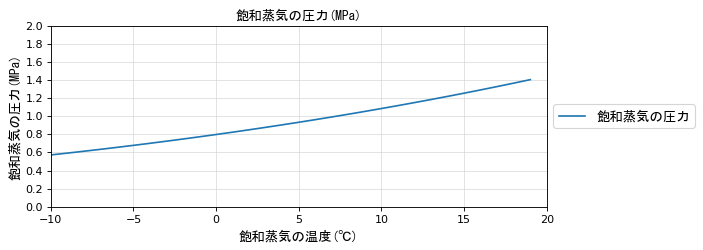

In [37]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('飽和蒸気の圧力(MPa)', fontdict={'fontproperties':fp})

x_values =[x for x in range(-10, 20, 1)]
y_values = [f_P_sgas(theta) for theta in range(-10, 20, 1)]
plt.plot(x_values, y_values, label ='飽和蒸気の圧力' )
        
ax=plt.gca()
ax.set_xlabel('飽和蒸気の温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('飽和蒸気の圧力(MPa)', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(0, 2.5, 0.2), minor=False)
ax.set_ybound(lower=0, upper=2)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

#### D.8.2　過熱蒸気に関する関数

<p style="text-indent:2em">圧縮機吸込領域において過熱蒸気の圧力と温度から比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,gas,comp,{\textit in}} \left( P, \: \theta \right) = &- 1.00110355 \times 10^{-1} \times P^{3} - 1.184450639 \times 10 \times P^{2} \\
    &- 2.052740252 \times 10^{2} \times P + 3.20391 \times 10^{-6} \times \left( \theta + 273.15 \right)^{3} \\
    &- 2.24685 \times 10^{-3} \times \left( \theta + 273.15 \right)^{2} + 1.279436909 \times \left( \theta + 273.15 \right) \\
    &+ 3.1271238 \times 10^{-2} \times P^{2} \times \left( \theta + 273.15 \right) \\
    &- 1.415359 \times 10^{-3} \times P \times \left( \theta + 273.15 \right)^{2} \\
    &+ 1.05553912 \times P \times \left( \theta + 273.15 \right) + 1.949505039 \times 10^{2}
\end{align*}  
$$

<div style="text-align: right;"> (14) </div>

ここで、  

$f_{H,gas,comp,{\textit in}}$：過熱蒸気の比エンタルピー(kJ/kg)        
$P$：過熱蒸気の圧力(MPa)    
$\theta$：過熱蒸気の温度(℃)   

である。

In [38]:
def f_H_gas_comp_in(P, theta):
    '''圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)を求める。'''
    
    a30 = -1.00110355  * 10**(-1)
    a20 = -1.184450639 * 10
    a10 = -2.052740252 * 10**(2)
    a03 =  3.20391     * 10**(-6)
    a02 = -2.24685     * 10**(-3)
    a01 =  1.279436909
    a21 =  3.1271238   * 10**(-2)
    a12 = -1.415359    * 10**(-3)
    a11 =  1.05553912
    a00 =  1.949505039 * 10**(2)
    
    T = theta + 273.15
    
    return    a30 * P**3 * T**0 + a20 * P**2 * T**0 + a10 * P**1 * T**0 \
            + a03 * P**0 * T**3 + a02 * P**0 * T**2 + a01 * P**0 * T**1 \
            + a21 * P**2 * T**1 + a12 * P**1 * T**2 \
            + a11 * P**1 * T**1 + a00 * P**0 * T**0

<p style="text-indent:2em">圧縮機吐出領域において過熱蒸気の圧力と比エントロピーから比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,gas,comp,out} \left( P, \: S \right) = &- 1.869892835947070 \times 10^{-1} \times P^{4} + 8.223224182177200 \times 10^{-1} \times P^{3} \\
    &+ 4.124595239531860 \times P^{2} - 8.346302788803210 \times 10 \times P \\
    &- 1.016388214044490 \times 10^{2} \times S^{4} + 8.652428629143880 \times 10^{2} \times S^{3} \\
    &- 2.574830800631310 \times 10^{3} \times S^{2} + 3.462049327009730 \times 10^{3} \times S \\
    &+ 9.209837906396910 \times 10^{-1} \times P^{3} \times S\\
    &- 5.163305566700450 \times 10^{-1} \times P^{2} \times S^{2} \\
    &+ 4.076727767130210 \times P \times S^{3} - 8.967168786520070 \times P^{2} \times S \\
    &- 2.062021416757910 \times 10 \times P \times S^{2} + 9.510257675728610 \times 10 \times P \times S \\
    &- 1.476914346214130 \times 10^{3}
\end{align*}  
$$

<div style="text-align: right;"> (15) </div>

ここで、  

$f_{H,gas,comp,out}$：過熱蒸気の比エンタルピー(kJ/kg)        
$P$：過熱蒸気の圧力(MPa)    
$S$：過熱蒸気の比エントロピー(kJ/(kg・K))       

である。

In [39]:
def f_H_gas_comp_out(P, S):
    '''圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)を求める。'''
    
    a40 = -1.869892835947070 * 10**(-1)
    a30 =  8.223224182177200 * 10**(-1)
    a20 =  4.124595239531860
    a10 = -8.346302788803210 * 10
    a04 = -1.016388214044490 * 10**(2)
    a03 =  8.652428629143880 * 10**(2)
    a02 = -2.574830800631310 * 10**(3)
    a01 =  3.462049327009730 * 10**(3)
    a31 =  9.209837906396910 * 10**(-1)
    a22 = -5.163305566700450 * 10**(-1)
    a13 =  4.076727767130210
    a21 = -8.967168786520070 
    a12 = -2.062021416757910 * 10
    a11 =  9.510257675728610 * 10
    a00 = -1.476914346214130 * 10**(3)
    
    return    a40 * P**4 * S**0 + a30 * P**3 * S**0 + a20 * P**2 * S**0 + a10 * P**1 * S**0 \
            + a04 * P**0 * S**4 + a03 * P**0 * S**3 + a02 * P**0 * S**2 + a01 * P**0 * S**1 \
            + a31 * P**3 * S**1 + a22 * P**2 * S**2 + a13 * P**1 * S**3 \
            + a21 * P**2 * S**1 + a12 * P**1 * S**2 \
            + a11 * P**1 * S**1 + a00 * P**0 * S**0

<p style="text-indent:2em">過熱蒸気の圧力と比エンタルピーから比エントロピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{S,gas} \left( P, \: h \right) = & 5.823109493752840 \times 10^{-2} \times P^{4} - 3.309666523931270 \times 10^{-1} \times P^{3} \\
    &+ 7.700179914440890 \times 10^{-1} \times P^{2} - 1.311726004718660 \times P \\
    &+ 1.521486605815750 \times 10^{-9} \times h^{4} - 2.703698863404160 \times 10^{-6} \times h^{3} \\
    &+ 1.793443775071770 \times 10^{-3} \times h^{2} - 5.227303746767450 \times 10^{-1} \times h \\
    &+ 1.100368875131490 \times 10^{-4} \times P^{3} \times h + 5.076769807083600 \times 10^{-7} \times P^{2} \times h^{2} \\
    &+ 1.202580329499520 \times 10^{-8}\times P \times h^{3} - 7.278049214744230 \times 10^{-4} \times P^{2} \times h \\
    &- 1.449198550965620 \times 10^{-5} \times P \times h^{2} + 5.716086851760640 \times 10^{-3} \times P \times h \\
    &+ 5.818448621582900 \times 10
\end{align*}  
$$

<div style="text-align: right;"> (16) </div>

ここで、  

$f_{S,gas}$：過熱蒸気の比エントロピー(kJ/(kg・K))         
$P$：過熱蒸気の圧力(MPa)    
$h$：過熱蒸気の比エンタルピー(kJ/kg)       

である。

In [40]:
def f_S_gas(P, h):
    '''過熱蒸気の比比エントロピー(kJ/(kg・K))を求める。'''
    
    a40 =  5.823109493752840 * 10**(-2)
    a30 = -3.309666523931270 * 10**(-1)
    a20 =  7.700179914440890 * 10**(-1)
    a10 = -1.311726004718660
    a04 =  1.521486605815750 * 10**(-9)
    a03 = -2.703698863404160 * 10**(-6)
    a02 =  1.793443775071770 * 10**(-3)
    a01 = -5.227303746767450 * 10**(-1)
    a31 =  1.100368875131490 * 10**(-4)
    a22 =  5.076769807083600 * 10**(-7)
    a13 =  1.202580329499520 * 10**(-8)
    a21 = -7.278049214744230 * 10**(-4)
    a12 = -1.449198550965620 * 10**(-5)
    a11 =  5.716086851760640 * 10**(-3)
    a00 =  5.818448621582900 * 10
    
    return    a40 * P**4 * h**0 + a30 * P**3 * h**0 + a20 * P**2 * h**0 + a10 * P**1 * h**0 \
            + a04 * P**0 * h**4 + a03 * P**0 * h**3 + a02 * P**0 * h**2 + a01 * P**0 * h**1 \
            + a31 * P**3 * h**1 + a22 * P**2 * h**2 + a13 * P**1 * h**3 \
            + a21 * P**2 * h**1 + a12 * P**1 * h**2 \
            + a11 * P**1 * h**1 + a00 * P**0 * h**0

#### D.8.3　過冷却液に関する関数

<p style="text-indent:2em">圧縮機吸込領域において過熱蒸気の圧力と温度から比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,liq} \left( P, \: \theta \right) = & 1.7902915 \times 10^{-2} \times P^{3} + 7.96830322 \times 10^{-1} \times P^{2} \\
    &+ 5.985874958 \times 10 \times P + 0 \times \left( \theta + 273.15 \right)^{3} \\
    &+ 9.86677 \times 10^{-4} \times \left( \theta + 273.15 \right)^{2} + 9.8051677\times 10^{-1} \left( \theta + 273.15 \right) \\
    &- 3.58645 \times 10^{-3} \times P^{2} \times \left( \theta + 273.15 \right) + 8.23122 \times 10^{-4} \times P \times \left( \theta + 273.15 \right) ^{2}\\
    &- 4.42639115 \times 10^{-1} \times P \times \left( \theta + 273.15 \right) - 1.415490404 \times 10^{2}
\end{align*}  
$$

<div style="text-align: right;"> (17) </div>

ここで、  

$f_{H,liq}$：過冷却液の比エンタルピー(kJ/kg)        
$P$：過冷却液の圧力(MPa)    
$\theta$：過冷却液の温度(℃)   

である。

In [41]:
def f_H_liq(P, theta):
    '''圧縮機吸込領域における過冷却液の比エンタルピー(kJ/kg)を求める。'''
    
    a30 =  1.7902915   * 10**(-2)
    a20 =  7.96830322  * 10**(-1)
    a10 =  5.985874958 * 10
    a03 =  0
    a02 =  9.86677     * 10**(-4)
    a01 =  9.8051677   * 10**(-1)
    a21 = -3.58645     * 10**(-3)
    a12 =  8.23122     * 10**(-4)
    a11 = -4.42639115  * 10**(-1)
    a00 = -1.415490404 * 10**(2)
    
    T = theta + 273.15
    
    return    a30 * P**3 * T**0 + a20 * P**2 * T**0 + a10 * P**1 * T**0 \
            + a03 * P**0 * T**3 + a02 * P**0 * T**2 + a01 * P**0 * T**1 \
            + a21 * P**2 * T**1 + a12 * P**1 * T**2 \
            + a11 * P**1 * T**1 + a00 * P**0 * T**0

In [42]:
# 外気温度
_theta_ex = 0
# 凝縮温度
_theta_ref_cnd = 7

In [43]:
# 蒸発温度
_theta_ref_evp = _theta_ex - (0.100 * _theta_ref_cnd + 2.95)
_theta_ref_evp

-3.6500000000000004

In [44]:
# 過熱度
_theta_ref_SH = 4.49 - 0.036 * _theta_ref_cnd
_theta_ref_SH

4.238

In [45]:
# 過冷却度
_theta_ref_SC = 0.245 * _theta_ref_cnd - 1.72
_theta_ref_SC

-0.0050000000000001155

In [46]:
# 凝縮圧力
_P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
_P_ref_cnd

0.9917765391354407

In [47]:
# 蒸発圧力
_P_ref_evp = P_ref_evp(_theta_ref_evp)
_P_ref_evp

0.7092106431464366

In [48]:
# 凝縮器出口温度
_theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
_theta_ref_cnd_out

7.005

In [49]:
# 凝縮器出口比エンタルピー
_h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
_h_ref_cnd_out

210.85339318311608

In [50]:
# 圧縮機吸込温度
_theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
_theta_ref_comp_in

0.5880000000000001

In [51]:
# 圧縮機吸込圧力
_P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
_P_ref_comp_in 

0.7092106431464366

In [52]:
# 圧縮機吸込比エンタルピー
_h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
_h_ref_comp_in

424.97074897341383

In [53]:
# 圧縮機吸込比エントロピー
_S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
_S_ref_comp_in

1.8348139088373046

In [54]:
# 圧縮機吐出比エントロピー
_S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
_S_ref_comp_out

1.8348139088373046

In [55]:
# 圧縮機吐出圧力
_P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
_P_ref_comp_out

0.9917765391354407

In [56]:
# 圧縮機吐出比エンタルピー
_h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
_h_ref_comp_out

434.5218503491551

In [57]:
# 暖房の理論効率
_e_ref_H_th = e_ref_H_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_cnd_out)
_e_ref_H_th 

23.418080111067813

In [58]:
def calc_e_ref_H_th(_theta_ex, _theta_ref_cnd):
    '''暖房の理論効率(-)を計算する。'''
    # _theta_ex：外気温度(℃)
    # _theta_ref_cnd：凝縮温度(℃)
    
    # 蒸発温度(℃)
    _theta_ref_evp = _theta_ex - (0.100 * _theta_ref_cnd + 2.95)
    # 過熱度(℃)
    _theta_ref_SH = 4.49 - 0.036 * _theta_ref_cnd
    # 過冷却度(℃)
    _theta_ref_SC = 0.245 * _theta_ref_cnd - 1.72
    
    # 凝縮圧力(MPa)
    _P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
    # 蒸発圧力(MPa)
    _P_ref_evp = P_ref_evp(_theta_ref_evp)
    
    # 凝縮器出口温度(℃)
    _theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
    # 凝縮器出口比エンタルピー(kJ/kg)
    _h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
    
    # 圧縮機吸込温度(℃)
    _theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
    # 圧縮機吸込圧力(MPa)
    _P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
    # 圧縮機吸込比エンタルピー(kJ/kg)
    _h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
    # 圧縮機吸込比エントロピー(kJ/(kg・K))
    _S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
    
    # 圧縮機吐出比エントロピー(kJ/(kg・K))
    _S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
    # 圧縮機吐出圧力(MPa)
    _P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
    # 圧縮機吐出比エンタルピー(kJ/kg)
    _h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
    
    # 暖房の理論効率(-)
    _e_ref_H_th = e_ref_H_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_cnd_out)
    
    return _e_ref_H_th

In [59]:
calc_e_ref_H_th(_theta_ex, _theta_ref_cnd)

23.418080111067813

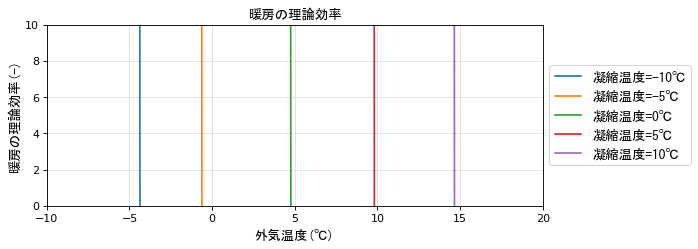

In [60]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('暖房の理論効率', fontdict={'fontproperties':fp})

for i,theta_cnd in enumerate([z for z in range(-10, 15, 5)]):
    x_values =[x for x in range(-10, 20, 1)]
    y_values = [calc_e_ref_H_th(theta_ex, theta_cnd) for theta_ex in range(-10, 20, 1)]
    plt.plot(x_values, y_values, label='凝縮温度='+str(theta_cnd)+'℃')
        
ax=plt.gca()
ax.set_xlabel('外気温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('暖房の理論効率(-)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 12, 2)], minor=False)
ax.set_ybound(lower=0, upper=10)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()